In [132]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

from sklearn.preprocessing import LabelEncoder

# this allows plots to appear directly in the notebook
%matplotlib inline

In [133]:
# load data into dataframe
df = pd.read_csv("emissions.csv", header=0)
loan_df = pd.read_csv("train_loan.csv", header=0)
test_df = pd.read_csv("test.csv", header=0)
train_df = pd.read_csv("train.csv", header=0)

## read from excel sheets
#xl = pd.ExcelFile('filename.xls')
#print xl.sheet_names

#df7 = xl.parse('sheet1')
#df8 = xl.parse('sheet2')
#df9 = xl.parse('sheet3')

In [134]:
# write to file
#df.to_csv('foo.csv')
#df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [135]:
# number of rows and columns
df.shape

(45511, 23)

In [136]:
# print first rows
df.head()

,file,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,...,25.4,43.5,34.4,74.0,195,NaN,980.0,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,M5,Manual,1970.0,Petrol,...,22.8,42.8,32.1,74.0,210,NaN,1103.0,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,...,25.0,42.8,34.0,73.0,195,NaN,980.0,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN


In [137]:
# basic information
df.describe()

,year,euro_standard,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
count,45511.000000,45511.000000,45504.000000,45498.000000,45498.000000,45504.000000,45498.000000,45498.000000,45504.000000,45502.000000,45511.000000,23190.000000,45192.000000,40150.000000,5430.000000,14801.000000
mean,2007.316055,3.969282,2182.770526,10.472676,6.139602,7.721963,30.527557,49.139714,40.048475,72.141437,189.592846,62.526498,375.084962,127.164387,171.675235,3.312089
std,3.832559,0.838025,899.100669,3.984944,1.783382,2.503880,10.623745,12.189658,11.869572,1.825107,56.993217,33.425421,1048.920760,1189.748216,35.786659,12.678128
min,2000.000000,2.000000,209.000000,3.100000,2.900000,1.200000,6.800000,5.400000,5.900000,0.200000,0.000000,1.000000,-200.000000,0.250000,0.290000,0.000000
25%,2004.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,NaN,NaN,NaN,NaN
50%,2008.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,NaN,NaN,NaN,NaN,NaN
75%,2011.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.000000,NaN,NaN,NaN,NaN,NaN
max,2013.000000,6.000000,8285.000000,41.200000,97.900000,44.000000,91.100000,97.400000,235.400000,83.000000,590.000000,600.000000,75000.000000,237000.000000,332.000000,396.000000


In [138]:
# number of observation for each parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 23 columns):
file                      45511 non-null object
year                      45511 non-null int64
manufacturer              45511 non-null object
model                     45511 non-null object
description               45511 non-null object
euro_standard             45511 non-null int64
transmission              45501 non-null object
transmission_type         45170 non-null object
engine_capacity           45504 non-null float64
fuel_type                 45511 non-null object
urban_metric              45498 non-null float64
extra_urban_metric        45498 non-null float64
combined_metric           45504 non-null float64
urban_imperial            45498 non-null float64
extra_urban_imperial      45498 non-null float64
combined_imperial         45504 non-null float64
noise_level               45502 non-null float64
co2                       45511 non-null int64
thc_emissions         

In [139]:
# accessing element
df.iloc[1, 3]

'145 Range'

In [140]:
# accessing rows
df.loc[0]

file                      DatapartC_july2000.csv
year                                        2000
manufacturer                          Alfa Romeo
model                                  145 Range
description                   1.6 Twin Spark 16v
euro_standard                                  2
transmission                                  M5
transmission_type                         Manual
engine_capacity                             1598
fuel_type                                 Petrol
urban_metric                                11.1
extra_urban_metric                           6.5
combined_metric                              8.2
urban_imperial                              25.4
extra_urban_imperial                        43.5
combined_imperial                           34.4
noise_level                                   74
co2                                          195
thc_emissions                                NaN
co_emissions                                 980
nox_emissions       

In [141]:
# accessing columns
df['noise_level']

0        74.0
1        74.0
2        74.0
3        73.0
4        74.0
5        74.0
6        74.0
7        74.0
8        73.5
9        73.5
10       74.0
11       74.0
12       71.0
13       74.0
14       74.0
15       73.5
16       73.5
17       74.0
18       74.0
19       71.0
20       73.5
21       73.0
22       72.0
23       72.0
24       74.0
25       75.0
26       74.0
27       74.0
28       74.0
29       75.0
         ... 
45481    74.0
45482    74.0
45483    72.0
45484    74.0
45485    74.0
45486    74.0
45487    72.0
45488    72.0
45489    74.0
45490    74.0
45491    74.0
45492    72.0
45493    66.0
45494    68.0
45495    70.0
45496    70.0
45497    74.0
45498    73.0
45499    74.0
45500    73.0
45501    73.0
45502    75.0
45503    69.0
45504    73.0
45505    74.0
45506    74.0
45507    72.0
45508    72.0
45509    74.0
45510    74.0
Name: noise_level, dtype: float64

In [142]:
# filter in a column
df.manufacturer[df['manufacturer'] == 'Lamborghini']
df['noise_level'][df['noise_level'] < 60]
df['model'][df['extra_urban_metric'] > 30]
df['extra_urban_metric'][(df['extra_urban_metric'] < 30) & (df['model'] == 'Omega - Model Year 2003')]

8544     7.7
8545     7.1
8546     7.9
8547     7.3
8548     5.6
8549     5.7
8550     8.6
8551     8.3
8552     8.7
8553     8.5
8554     8.9
8555     7.8
8556     9.0
11626    7.7
11627    7.1
11628    7.9
11629    7.3
11630    5.6
11631    5.7
11632    8.6
11633    8.3
11634    8.7
11635    8.5
11636    7.8
11637    9.0
11638    8.9
Name: extra_urban_metric, dtype: float64

In [143]:
# filter column by string which contains the word 'sunroof'
df[df['description'].str.contains('sunroof')]

,file,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
14230,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,1.9 dCi (JK0GB6)(w/sunroof),3,M6,Manual,1870.0,Diesel,...,31.8,47.1,40.4,72.0,187,NaN,337.0,694.0,NaN,68.000
14232,Part_A_Euro_IV_may2005.csv,2005,Renault,Espace,2.0 16V 140 (JK0KB6)(w/sunroof),4,M6,Manual,1998.0,Petrol,...,22.1,36.3,29.5,70.8,229,NaN,827.0,65.0,NaN,NaN
14234,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.0T 16V 165 (JK0BB6)(w/sunroof),3,M6,Manual,1998.0,Petrol,...,21.9,35.8,29.2,70.8,232,NaN,722.0,37.0,NaN,NaN
14236,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.0T 16V 165 Auto (JK0BB6)(w/sunroof),3,A5,Automatic,1998.0,Petrol,...,18.5,34.9,26.4,67.6,251,NaN,880.0,44.0,NaN,NaN
14238,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.2 dCi (JK0HB6)(w/sunroof),3,M6,Manual,2188.0,Diesel,...,26.9,43.5,35.8,70.9,211,NaN,288.0,594.0,NaN,65.000
14240,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.2 dCi Auto From VIN JK0HBB(w/sunroof),3,A5,Automatic,2188.0,Diesel,...,23.5,37.7,31.0,69.9,244,NaN,112.0,591.0,NaN,65.000
14241,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,3.0 dCi Auto (JK0JA/BB)(w/w.o sunroof),3,A5,Automatic,2958.0,Diesel,...,21.2,38.2,29.7,70.6,252,NaN,427.0,475.0,NaN,68.000
14243,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,3.5 V6 24V Auto (JK0FBB)(w/sunroof),3,A5,Automatic,3498.0,Petrol,...,16.2,29.8,22.8,71.0,297,NaN,462.0,67.0,NaN,NaN
14245,Part_B_Euro_III_may2005.csv,2005,Renault,Grand Espace,2.0T 16V 165 (JK0BD6)(w/sunroof),3,M6,Manual,1998.0,Petrol,...,21.9,35.8,29.1,70.8,232,NaN,722.0,37.0,NaN,NaN
14247,Part_B_Euro_III_may2005.csv,2005,Renault,Grand Espace,2.0T 16V Auto (JK0BDB)(w/sunroof),3,A6,Automatic,1999.0,Petrol,...,18.2,34.0,25.9,67.6,255,NaN,880.0,44.0,NaN,NaN


In [144]:
# filter by observations
df[df['year'].isin([2005, 2008])]

,file,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
12231,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,147,1.6 (120 bhp),3,M5,Manual,1598.0,Petrol,...,25.2,44.1,34.4,74.0,194,NaN,355.0,90.0,NaN,NaN
12232,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,147,1.6 TS (105 bhp),3,M5,Manual,1598.0,Petrol,...,25.4,44.8,34.9,72.0,192,NaN,414.0,42.0,NaN,NaN
12233,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,147,1.9 JTD,3,M5,Manual,1910.0,Diesel,...,36.2,60.1,48.7,70.5,155,NaN,309.0,435.0,NaN,37.000
12234,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,147,1.9 JTD 16v M-Jet (140 bhp),3,M6,Manual,1910.0,Diesel,...,35.3,60.1,47.9,74.0,157,NaN,342.0,331.0,NaN,46.000
12235,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,147,1.9 JTD 16v M-Jet (150 bhp),3,M6,Manual,1910.0,Diesel,...,35.3,60.1,47.9,74.0,157,NaN,366.0,395.0,NaN,42.000
12236,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,147,2,3,M5,Manual,1970.0,Petrol,...,23.3,40.4,31.7,74.0,211,NaN,439.0,113.0,NaN,NaN
12237,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,147,2.0 Selespeed,3,SAT5,Automatic,1970.0,Petrol,...,23.3,40.4,31.7,74.0,211,NaN,439.0,113.0,NaN,NaN
12238,Part_A_Euro_IV_may2005.csv,2005,Alfa Romeo,147,GTA,4,M6,Manual,3179.0,Petrol,...,15.6,32.8,23.3,74.0,287,NaN,388.0,30.0,NaN,NaN
12239,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,156 Saloon,1.6,3,M5,Manual,1598.0,Petrol,...,24.8,44.1,34.4,72.0,195,NaN,428.0,48.0,NaN,NaN
12240,Part_B_Euro_III_may2005.csv,2005,Alfa Romeo,156 Saloon,1.8,3,M5,Manual,1747.0,Petrol,...,23.3,44.1,33.2,72.0,202,NaN,338.0,38.0,NaN,NaN


In [145]:
# return column without the NaN observations
df['thc_nox_emissions'].dropna()

33955    176.0
33956    193.0
33958    176.0
33959    193.0
33963    207.0
33965    214.0
33966    201.0
33967    186.0
33968    189.0
33974    216.0
33994    156.0
34002    140.0
34003    140.0
34004    183.0
34005    153.0
34008    160.0
34009    162.0
34010    166.0
34011    126.0
34012    160.0
34019    180.0
34022    158.0
34023    153.0
34033    140.0
34034    183.0
34035    183.0
34038    162.0
34039    166.0
34040    126.0
34041    160.0
         ...  
45414     86.0
45415     86.0
45440     86.0
45442     86.0
45443     86.0
45449    112.0
45452    112.0
45453    112.0
45455     85.0
45456     72.0
45457     72.0
45458     72.0
45459     96.0
45460     96.0
45461     96.0
45462     89.0
45463     89.0
45464     89.0
45465     89.0
45466     89.0
45467     89.0
45468     89.0
45469     89.0
45502    112.0
45505    108.0
45506    108.0
45507     35.0
45508     35.0
45509     32.0
45510     32.0
Name: thc_nox_emissions, dtype: float64

In [146]:
# copy data frame
df10 = df.copy()

In [147]:
# most common value (mode)
df['manufacturer'].mode()

0    Mercedes-Benz
dtype: object

In [148]:
# mean value
df['engine_capacity'].mean()

2182.7705256680733

In [149]:
# median
df['engine_capacity'].median()

1988.0

In [150]:
# unique values
df['manufacturer'].unique()

array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Daewoo Cars', 'Daihatsu',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar Cars', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lotus',
       'LTI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Metrocab',
       'Micro Compact Car', 'Mitsubishi', 'Nissan', 'Perodua', 'Peugeot',
       'Porsche', 'Proton', 'Renault', 'Rolls-Royce',
       'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo',
       'MG Rover Group', 'Mini', 'Morgan Motor Company', 'Bentley Motors',
       'Smart', 'SsangYong', 'Corvette', 'Dodge', 'Hummer', 'Abarth',
       'Infiniti', 'MG Motors Uk', 'McLaren', 'Dacia', 'MG Motors UK'], dtype=object)

In [151]:
# count number of observations
df['manufacturer'].count()

45511

In [152]:
# count number of observations of each type (frequency table) (same as histogram)
df['manufacturer'].value_counts(ascending=True)

MG Motors UK               5
Tata                       7
MG Motors Uk               8
McLaren                    8
Dacia                      9
Hummer                    10
Abarth                    19
Metrocab                  22
LTI                       30
Infiniti                  47
Isuzu                     52
Corvette                  52
Morgan Motor Company      55
Rover Group Limited       59
Perodua                   61
Dodge                     63
Rolls-Royce               67
Ferrari                   81
Micro Compact Car         85
Maserati                  87
Lotus                     89
Bentley Motors            96
Lamborghini              103
Aston Martin Lagonda     126
Daewoo Cars              156
SsangYong                168
Daihatsu                 169
Lexus                    170
Cadillac                 172
Proton                   259
                        ... 
Mini                     371
Chevrolet                443
Jaguar Cars              453
Alfa Romeo    

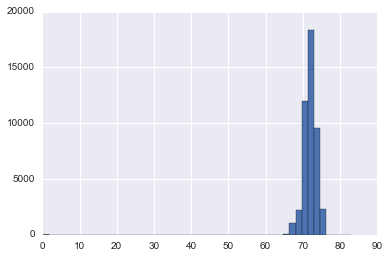

In [153]:
# plot histogram
df['noise_level'].hist(bins=50)

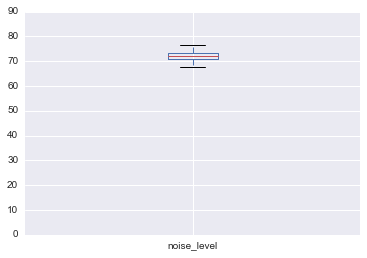

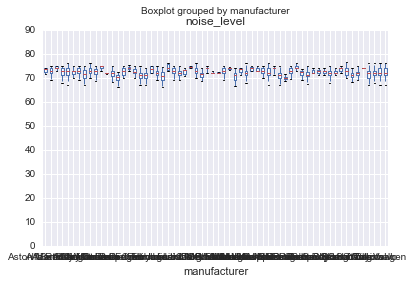

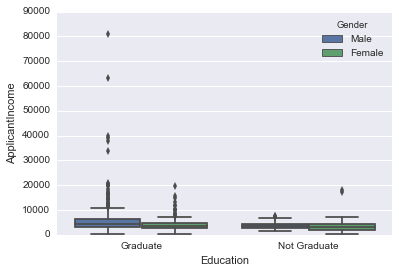

In [154]:
# plot box plot
df.boxplot(column='noise_level', return_type='axes')
plt.show()
df.boxplot(column='noise_level', by = 'manufacturer')
plt.show()

sns.boxplot(x = loan_df['Education'], y = loan_df['ApplicantIncome'], hue = loan_df['Gender'])

In [155]:
# identify outlier data (filter) thanks to the histogram above
df['noise_level'][df['noise_level'] < 60]

# remove outlier data
df = df[df['noise_level'] > 60]

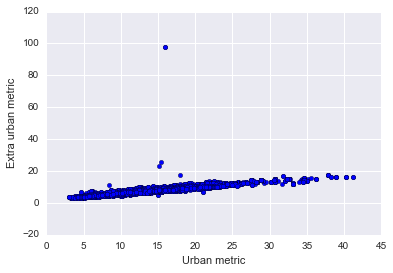

In [156]:
# plot scatter plot
plt.scatter(df['urban_metric'], df['extra_urban_metric'])
plt.xlabel('Urban metric')
plt.ylabel('Extra urban metric')

In [157]:
# concatenate columns into a new dataframe
df2 = pd.concat([df['urban_metric'], df['extra_urban_metric'], df['combined_metric']], axis=1)

In [158]:
# merge 2 dataframe according to one common column
# data_df = pd.merge(data_df, articles_df, on='reference_article')

In [159]:
# sort by noise level
df.sort_values(by='noise_level')

,file,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
9540,Part_B_Euro_III_latest.csv,2004,Daihatsu,Terios,J102 1.3L EFi 4WD,3,A4,Automatic,1298.0,Petrol,...,26.2,39.2,33.6,65.0,200,100.0,600.0,NaN,NaN,NaN
2166,Part_B_Euro_III_july2001.csv,2001,Daihatsu,Terios,Terios J102 1.3L EFi 4WD,3,A4,Automatic,1298.0,Petrol,...,26.2,39.2,33.6,65.0,200,79.0,637.0,18.0,NaN,NaN
6506,Part_B_Euro_III_may2003.csv,2003,Daihatsu,Terios,J102 1.3L EFi 4WD,3,A4,Automatic,1298.0,Petrol,...,26.2,39.2,33.6,65.0,200,100.0,600.0,NaN,NaN,NaN
4256,Part_B_Euro_III_may2002.csv,2002,Daihatsu,Terios,Terios J102 1.3L EFi 4WD,3,A4,Automatic,1298.0,Petrol,...,26.2,39.2,33.6,65.0,200,79.0,637.0,18.0,NaN,NaN
16604,Part_B_Euro_III_may2006.csv,2006,Daihatsu,Terios,J102 1.3L EFi 4WD,3,A4,Automatic,1298.0,Petrol,...,26.2,39.2,33.6,65.0,200,79.0,637.0,18.0,NaN,NaN
12774,Part_B_Euro_III_may2005.csv,2005,Daihatsu,Terios,J102 1.3L EFi 4WD,3,A4,Automatic,1298.0,Petrol,...,26.2,39.2,33.6,65.0,200,NaN,637.0,18.0,NaN,NaN
43363,download-data-for-Aug-2013-Euro-5.csv,2013,Nissan,Micra,1.2,5,CVT,Automatic,1198.0,Petrol,...,42.2,61.4,52.3,65.8,125,18.0,112.0,8.0,NaN,NaN
39688,download-data-for-Aug-2012-Euro-5.csv,2012,Nissan,Micra,1.2,5,CVT,Automatic,1198.0,Petrol,...,42.2,61.4,52.3,65.8,125,18.0,112.0,8.0,NaN,NaN
36135,Euro 5 snapshot 2011.csv,2011,Nissan,Micra - Model Year 2010,1.2,5,CVT,Automatic,1198.0,Petrol,...,42.2,61.4,52.3,65.8,125,18.0,112.0,8.0,NaN,NaN
43421,download-data-for-Aug-2013-Euro-5.csv,2013,Peugeot,2008,1.6 e-HDi 92 EGC,5,AMT6,Automatic,1560.0,Diesel,...,68.9,78.5,74.3,65.9,98,NaN,192.0,165.0,194.0,0.100


In [160]:
# compute mean value of noise level for each manufacturer and sort them in ascending order
df.pivot_table(values='noise_level', index=['manufacturer'], aggfunc=lambda x: x.mean()).sort_values()

manufacturer
Perodua                 69.791803
Daihatsu                69.919527
Mazda                   70.584882
Infiniti                70.721277
Honda                   70.902619
Ford                    70.949657
Nissan                  71.109309
Subaru                  71.194454
Lexus                   71.208824
Toyota                  71.448387
Chevrolet               71.509707
Renault                 71.540973
Daewoo Cars             71.603205
Suzuki                  71.661959
Bentley Motors          71.880208
Seat                    71.942958
Proton                  71.971042
Hyundai                 72.067395
Kia                     72.078641
Volkswagen              72.148831
Volvo                   72.167197
Mitsubishi              72.175489
MG Motors UK            72.200000
Mercedes-Benz           72.240439
Micro Compact Car       72.247059
Dacia                   72.277778
BMW                     72.295957
Skoda                   72.326203
Rolls-Royce             72.382090
R

In [161]:
# same using groupby
grouped_data = df.groupby('manufacturer')
grouped_data['noise_level'].mean().sort_values()

manufacturer
Perodua                 69.791803
Daihatsu                69.919527
Mazda                   70.584882
Infiniti                70.721277
Honda                   70.902619
Ford                    70.949657
Nissan                  71.109309
Subaru                  71.194454
Lexus                   71.208824
Toyota                  71.448387
Chevrolet               71.509707
Renault                 71.540973
Daewoo Cars             71.603205
Suzuki                  71.661959
Bentley Motors          71.880208
Seat                    71.942958
Proton                  71.971042
Hyundai                 72.067395
Kia                     72.078641
Volkswagen              72.148831
Volvo                   72.167197
Mitsubishi              72.175489
MG Motors UK            72.200000
Mercedes-Benz           72.240439
Micro Compact Car       72.247059
Dacia                   72.277778
BMW                     72.295957
Skoda                   72.326203
Rolls-Royce             72.382090
R

In [162]:
# groupby
df10.groupby(['manufacturer', 'year']).sum()

euro_standard  engine_capacity  urban_metric  \
manufacturer         year                                                 
Abarth               2009             13           4104.0          26.6   
                     2010              9           2736.0          17.9   
                     2011             15           4104.0          24.9   
                     2012             30           8208.0          49.8   
                     2013             25           6840.0          41.8   
Alfa Romeo           2000             56          60702.0         383.0   
                     2001            107          92343.0         585.9   
                     2002            127          92187.0         578.2   
                     2003            112          76493.0         437.8   
                     2004            101          73694.0         442.0   
                     2005            121          82223.0         462.0   
                     2006             80          45325.0         238.3   
                     2007            124          74479.0         393.6   
                     2008            192         120378.0         622.0   
                     2009            187         106019.0         541.3   
                     2010            223         108837.0         546.9   
                     2011            105          34306.0         153.4   
                     2012             80          23873.0         107.8   
                     2013             86          24748.0         112.8   
Aston Martin Lagonda 2000             10          27890.0         160.5   
                     2001              6          11870.0          63.9   
                     2002              9          17805.0          89.5   
                     2003             19          35610.0         178.2   
                     2004             15          29675.0         153.3   
                     2005             27          47480.0         232.8   
                     2006             31          51762.0         258.0   
                     2007             20          26369.0         125.2   
                     2008             36          46803.0         215.7   
                     2009             48          62208.0         279.2   
                     2010             38          45080.0         180.1   
...                                  ...              ...           ...   
Vauxhall             2012           1325         433647.0        2012.6   
                     2013           1340         432582.0        1936.9   
Volkswagen           2000            483         341606.0        1873.9   
                     2001            536         315435.0        1722.2   
                     2002            506         304442.0        1625.9   
                     2003            814         504471.0        2567.1   
                     2004            571         349688.0        1840.2   
                     2005            647         392696.0        1997.8   
                     2006            836         487880.0        2478.3   
                     2007            879         466549.0        2309.7   
                     2008            900         456743.0        2246.6   
                     2009           1293         625396.0        2940.3   
                     2010           2031         889659.0        4144.2   
                     2011           1264         481536.0        2168.5   
                     2012           1760         631919.0        2791.7   
                     2013           2410         854240.0        3677.0   
Volvo                2000            110          85759.0         486.8   
                     2001            160         111459.0         648.9   
                     2002            422         286680.0        1665.7   
                     2003            880         583087.0        3347.3   
                     2004            845         559

In [163]:
# pivot table
pd.pivot_table(df10, values='noise_level', index=['manufacturer', 'year'], columns=['transmission_type'])

transmission_type          Automatic     Manual
manufacturer         year                      
Abarth               2009        NaN  73.333333
                     2010        NaN  73.000000
                     2011  73.000000  72.750000
                     2012  73.250000  73.375000
                     2013  73.250000  73.166667
Alfa Romeo           2000  72.166667  73.886364
                     2001  72.500000  72.916667
                     2002  73.000000  72.517241
                     2003  73.142857  72.925926
                     2004  73.125000  72.687500
                     2005  73.142857  72.966667
                     2006        NaN  73.425000
                     2007  72.000000  73.543478
                     2008  71.833333  73.263889
                     2009  72.000000  73.111111
                     2010  72.250000  73.193182
                     2011  71.833333  73.277778
                     2012  71.833333  73.153846
                     2013  71.833333  73.153846
Aston Martin Lagonda 2000  73.933333  74.950000
                     2001  74.000000  75.000000
                     2002  74.000000  74.000000
                     2003  74.000000  74.333333
                     2004  74.500000  74.333333
                     2005  74.000000  74.600000
                     2006  74.000000  74.500000
                     2007  74.000000  74.666667
                     2008  73.750000  74.600000
                     2009  73.833333  74.666667
                     2010  73.750000  75.000000
...                              ...        ...
Vauxhall             2012  72.375410  71.720588
                     2013  72.037037  71.570093
Volkswagen           2000  71.433962  72.889764
                     2001  71.420000  72.705607
                     2002  71.382979  72.809278
                     2003  71.716418  73.039157
                     2004  71.673469  72.814159
                     2005  71.979592  73.174242
                     2006  71.705882  73.181250
                     2007  71.263889  72.956209
                     2008  71.605263  73.328859
                     2009  71.127273  72.935644
                     2010  71.006452  72.660396
                     2011  70.767677  72.197452
                     2012  70.369565  71.799065
                     2013  70.456044  71.864583
Volvo                2000  72.411765  72.047619
                     2001  71.904762  71.724138
                     2002  72.421053  72.115942
                     2003  72.719008  72.515385
                     2004  72.697479  72.590164
                     2005  72.882353  72.529412
                     2006  72.727273  72.422222
                     2007  72.586957  72.280000
                     2008  72.200000  72.415094
                     2009  72.340426  72.500000
                     2010  73.454545  72.326923
                     2011  72.139535  71.620690
                     2012  71.413793  71.411765
                     2013  71.207407  71.177419

[687 rows x 2 columns]

In [164]:
# filter
# grouped_data.get_group('Lamborghini')['noise_level']
# same as
# df.noise_level[df['manufacturer'] == 'Lamborghini']

In [165]:
# create list of header labels
train_header = list(train_df.columns.values)
train_header

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

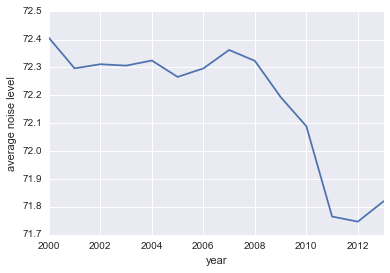

In [166]:
# relationship between 2 numerical variables
grouped_data = df.groupby('year')
grouped_data['noise_level'].mean().plot()
plt.ylabel('average noise level')

In [167]:
# drop duplicates
# df7.drop_duplicates(subset=['column_name'], keep='last', inplace = True)

In [168]:
# drop un-insightful columns
df = df.drop(['file', 'particulates_emissions'], axis=1)

In [169]:
# find number of null values in a column
df['thc_nox_emissions'].isnull().sum()

40068

In [170]:
# same
len(df['thc_nox_emissions'][df['thc_nox_emissions'].isnull()])

40068

In [171]:
# find maximum
df['noise_level'].max()

83.0

In [172]:
# find minimum
df['noise_level'].min()

65.0

In [173]:
# find index of maximum
df['noise_level'].argmax()

34525

In [174]:
# find index of minimum
df['noise_level'].argmin()

2166

In [175]:
# convert dataframe to numpy array
data = df.values

In [176]:
# applymap: for loop for the whole data frame
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert(grade):
    if grade >= 90 and grade <= 100:
        x = 'A'
    elif grade >= 80 and grade <= 89:
        x = 'B'
    elif grade >= 70 and grade <= 79:
        x = 'C'
    elif grade >= 60 and grade <= 69:
        x = 'D'
    elif grade >= 0 and grade <= 59:
        x = 'F'

    return x

grades_df.applymap(convert)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [177]:
# apply: for loop for a data frame column (or pandas series)

names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])


def reverse_name(name):
        split_name = name.split()
        return split_name[1]+', '+split_name[0]
        
names.apply(reverse_name)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

In [178]:
# standardize column
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardise_column(column):
    return (column - column.mean()) / column.std(ddof=0)

# clean data

In [179]:
# format date
def format_date(int_date):
    """ convert integer date yyyymmdd to datetime object """
    # convert to string
    date = str(int_date)

    return dt.strptime(date, '%Y%m%d')    
    
#df7['date'] = data_df['date'].apply(format_date)

In [180]:
# convert string to lower case
df['manufacturer'] = df['manufacturer'].str.lower()

In [181]:
# map string to integer
Ports = list(enumerate(np.unique(train_df['Embarked'])))    # determine all values of Embarked,
Ports_dict = {name : i for i, name in Ports}              # set up a dictionary in the form  Ports : index
train_df['Embarked'] = train_df['Embarked'].map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int

train_df['Embarked']

0      3
1      1
2      3
3      3
4      3
5      2
6      3
7      3
8      3
9      1
10     3
11     3
12     3
13     3
14     3
15     3
16     2
17     3
18     3
19     1
20     3
21     3
22     2
23     3
24     3
25     3
26     1
27     3
28     2
29     3
      ..
861    3
862    3
863    3
864    3
865    3
866    1
867    3
868    3
869    3
870    3
871    3
872    3
873    3
874    1
875    1
876    3
877    3
878    3
879    1
880    3
881    3
882    3
883    3
884    3
885    2
886    3
887    3
888    3
889    1
890    2
Name: Embarked, dtype: int64

In [182]:
# map string into integer
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    loan_df[i] = le.fit_transform(loan_df[i])

In [183]:
def map_data(df, column, mapping):
    """
    map column in dataframe
    """
    df[column] = df[column].map(mapping).dropna().astype(int)
    
map_gender = {'Male':1, 'Female':0}    
map_data(loan_df, 'Gender', map_gender)

In [184]:
# remove null observations in dataframe
df[df['thc_nox_emissions'].notnull()]

,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,...,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions
33955,2011,alfa romeo,159,2.0 JTDm 16v 136 bhp,5,M6,Manual,1956.0,Diesel,6.6,...,5.1,42.8,67.3,55.4,74.0,134,NaN,66.0,149.0,176.0
33956,2011,alfa romeo,159,2.0 JTDm 16v 170 bhp,5,M6,Manual,1956.0,Diesel,6.9,...,5.3,40.9,65.7,53.3,74.0,139,NaN,60.0,164.0,193.0
33958,2011,alfa romeo,159 Sportwagon,2.0 JTDm 16v 136 bhp,5,M6,Manual,1956.0,Diesel,6.8,...,5.2,41.5,65.7,54.3,74.0,137,NaN,66.0,149.0,176.0
33959,2011,alfa romeo,159 Sportwagon,2.0 JTDm 16v 170 bhp,5,M6,Manual,1956.0,Diesel,7.1,...,5.4,39.8,64.2,52.3,74.0,142,NaN,60.0,164.0,193.0
33963,2011,alfa romeo,Giulietta,1.6 JTDm-2 105 bhp,5,M6,Manual,1598.0,Diesel,5.5,...,4.4,51.4,76.3,64.2,74.0,114,NaN,215.0,173.0,207.0
33965,2011,alfa romeo,Giulietta,2.0 JTDm-2 140 bhp,5,M6,Manual,1956.0,Diesel,5.6,...,4.5,50.4,72.4,62.8,72.5,119,NaN,389.0,161.0,214.0
33966,2011,alfa romeo,Giulietta,2.0 JTDm-2 170 bhp,5,M6,Manual,1956.0,Diesel,5.8,...,4.7,48.7,68.9,60.1,74.5,124,NaN,152.0,158.0,201.0
33967,2011,alfa romeo,Giulietta,2.0 JTDm-2 170 bhp Alfa TCT,5,SAT6,Automatic,1956.0,Diesel,5.3,...,4.5,53.3,70.6,62.8,72.5,119,NaN,182.0,160.0,186.0
33968,2011,alfa romeo,MiTo,1.3 JTDm-2 85 bhp,5,M5,Manual,1248.0,Diesel,4.6,...,3.6,61.4,94.2,78.5,73.0,95,NaN,315.0,164.0,189.0
33974,2011,alfa romeo,MiTo,1.6 JTDm-2 120 bhp,5,M6,Manual,1598.0,Diesel,5.3,...,4.4,53.3,74.3,64.2,73.0,114,NaN,389.0,155.0,216.0


In [185]:
# fill by median of a group

# map gender
train_df['Gender'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# create a reference table with the medians by gender and class
median_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = train_df[(train_df['Gender'] == i) & (train_df['Pclass'] == j+1)]['Age'].dropna().median()
        
# create a extra column
train_df['AgeFill'] = train_df['Age']      

# fill it with the median ages
for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) & (train_df.Gender == i) & (train_df.Pclass == j+1),'AgeFill'] = median_ages[i,j] 
     

In [186]:
# fill missing values
df3 = df.copy()
df3.fillna(value=5)

,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,...,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions
0,2000,alfa romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,11.1,...,8.2,25.4,43.5,34.4,74.0,195,5.0,980.0,5.0,5.0
1,2000,alfa romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,11.5,...,8.4,24.6,42.8,33.6,74.0,200,5.0,1105.0,5.0,5.0
2,2000,alfa romeo,145 Range,Cloverleaf,2,M5,Manual,1970.0,Petrol,12.4,...,8.8,22.8,42.8,32.1,74.0,210,5.0,1103.0,5.0,5.0
3,2000,alfa romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,11.3,...,8.3,25.0,42.8,34.0,73.0,195,5.0,980.0,5.0,5.0
4,2000,alfa romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,11.5,...,8.4,24.6,42.8,33.6,74.0,200,5.0,1105.0,5.0,5.0
5,2000,alfa romeo,146 Range,Ti,2,M5,Manual,1970.0,Petrol,12.4,...,8.8,22.8,42.8,32.1,74.0,210,5.0,1103.0,5.0,5.0
6,2000,alfa romeo,156 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,11.4,...,8.2,24.8,44.1,34.4,74.0,195,5.0,919.0,5.0,5.0
7,2000,alfa romeo,156 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,11.4,...,8.2,24.8,44.1,34.4,74.0,195,5.0,1069.0,5.0,5.0
8,2000,alfa romeo,156 Range,2.0 Selespeed,2,SAT5,Automatic,1970.0,Petrol,11.7,...,8.5,24.1,42.8,33.2,73.5,202,5.0,1078.0,5.0,5.0
9,2000,alfa romeo,156 Range,2.0 Twin Spark 16v,2,M5,Manual,1970.0,Petrol,11.7,...,8.5,24.1,42.8,33.2,73.5,202,5.0,1078.0,5.0,5.0


In [187]:
# same
if len(test_df.Fare[ test_df.Fare.isnull() ]) > 0:
    median_fare = np.zeros(3)
    for f in range(0,3):                                             
        median_fare[f] = test_df[ test_df.Pclass == f+1 ]['Fare'].dropna().median()
    for f in range(0,3):                                              
        test_df.loc[ (test_df.Fare.isnull()) & (test_df.Pclass == f+1 ), 'Fare'] = median_fare[f]
   

In [188]:
def fill_most_common(df, column):
    """
    fill NaN values in column in df by the most common entry
    """
    
    if len(df[column][df[column].isnull()]) > 0:    
        df[column][df[column].isnull()] = df[column].dropna().mode().values    

    # equivalent to
#    df[column].fillna(df[column].dropna().mode()[0], inplace=True)

fill_most_common(train_df, 'Gender')

In [189]:
def fill_mean(df, column):    
    """
    fill NaN values in column in df by the mean of the column
    """   

    mean_value = df[column].dropna().mean()

    if len(df[column][df[column].isnull()]) > 0:
        df.loc[(df[column].isnull()), column] = mean_value
        
    # equivalent to 
#    df[column].fillna(df[column].mean(), inplace=True)

fill_mean(loan_df, 'LoanAmount')

In [190]:
# cancel extreme values using a log transform
loan_df['LoanAmount_log'] = np.log(loan_df['LoanAmount'])